# TITANIC DATASET USING LOGISTICREGRESSION

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv(r"C:\Users\ADMIN\Downloads\Titanic Dataset.csv")

In [4]:
data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.shape

(891, 12)

In [8]:
list(data)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [10]:
data.groupby('Age').count()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,
0.42,1,1,1,1,1,1,1,1,1,0,1
0.67,1,1,1,1,1,1,1,1,1,0,1
0.75,2,2,2,2,2,2,2,2,2,0,2
0.83,2,2,2,2,2,2,2,2,2,0,2
0.92,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
70.00,2,2,2,2,2,2,2,2,2,1,2
70.50,1,1,1,1,1,1,1,1,1,0,1
71.00,2,2,2,2,2,2,2,2,2,1,2


In [11]:
data.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
data.head(9)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [14]:
import seaborn as sns

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8932\1073853924.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x=sns.heatmap(data.corr(),annot=True)


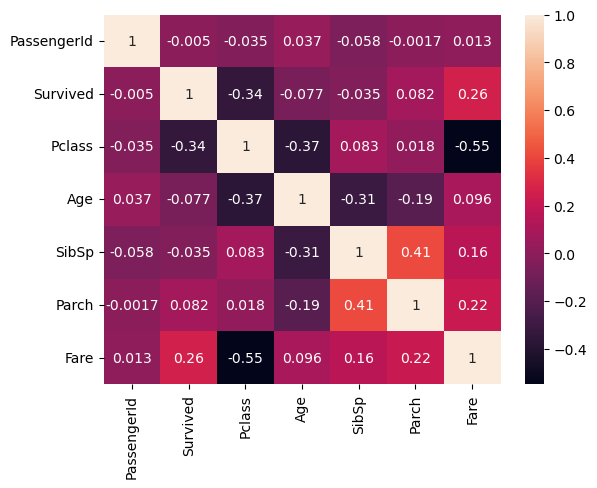

In [15]:
x=sns.heatmap(data.corr(),annot=True)

In [16]:
#a1=pd.get_dummies(data1)

In [17]:
#a1.head(9)

In [18]:
#x=a1.drop(['Survived'],axis=1)
#x.head(9)
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [19]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [20]:
data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [21]:
data1=data.drop(['PassengerId','Ticket','Name','Cabin'],axis=1)

In [22]:
data1.head(9)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S


In [23]:
data2=data1.drop(['Survived'],axis=1)
data2.head(9)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
5,3,male,29.699118,0,0,8.4583,Q
6,1,male,54.000000,0,0,51.8625,S
7,3,male,2.000000,3,1,21.0750,S
8,3,female,27.000000,0,2,11.1333,S


In [24]:
x=pd.get_dummies(data2)
x.head(9)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
5,3,29.699118,0,0,8.4583,0,1,0,1,0
6,1,54.000000,0,0,51.8625,0,1,0,0,1
7,3,2.000000,3,1,21.0750,0,1,0,0,1
8,3,27.000000,0,2,11.1333,1,0,0,0,1


In [25]:
y=data1['Survived']

In [26]:
y.head(9)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
Name: Survived, dtype: int64

In [27]:
a1=pd.get_dummies(data)
a1.head(9)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.000000,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,3,29.699118,0,0,8.4583,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,7,0,1,54.000000,0,0,51.8625,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0,3,2.000000,3,1,21.0750,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,9,1,3,27.000000,0,2,11.1333,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=45)

In [30]:
x_train.shape

(596, 10)

In [31]:
y_train.shape

(596,)

In [32]:
x_test.shape

(295, 10)

In [33]:
y_test.shape

(295,)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
r=LogisticRegression()

In [36]:
reg=r.fit(x_train,y_train)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
y_pred=r.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [47]:
#from sklearn.metrics import classification_report
from sklearn import metrics

In [48]:
cnf=metrics.confusion_matrix(y_test,y_pred)

In [49]:
cnf

array([[167,  25],
       [ 26,  77]], dtype=int64)

In [52]:

'''
TP FP
FN TN
TP  actual and predicted is same i.e 1
TN actual and predicted is same i.e both values of actual and predicted as 0
FP 1 as 0
FN 0 as 1'''


'\nTP FP\nFN TN\nTP  actual and predicted is same i.e 1\nTN actual and predicted is same i.e both values of actual and predicted as 0\nFP 1 as 0\nFN 0 as 1'

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       192
           1       0.75      0.75      0.75       103

    accuracy                           0.83       295
   macro avg       0.81      0.81      0.81       295
weighted avg       0.83      0.83      0.83       295



In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,y_pred)

0.8271186440677966

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
mean_squared_error(y_test,y_pred)

0.17288135593220338

In [42]:
Results=pd.DataFrame(columns=['actual','predicted'])
Results['actual']=y_test
Results['predicted']=y_pred
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(9)

,index,actual,predicted,Id
0,248,1,0,0
1,197,0,0,1
2,133,1,1,2
3,169,0,0,3
4,736,0,0,4
5,166,1,1,5
6,250,0,0,6
7,719,0,0,7
8,603,0,0,8


[]

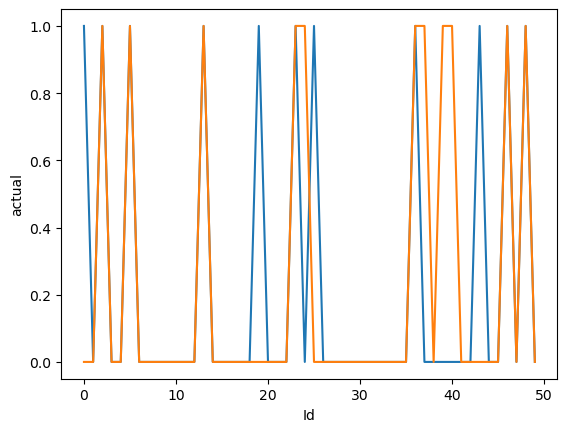

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Id',y='actual',data=Results.head(50))
sns.lineplot(x='Id',y='predicted',data=Results.head(50))
plt.plot()

In [44]:
import seaborn as sns

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8932\685688521.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data2.corr(),annot=True)


<Axes: >

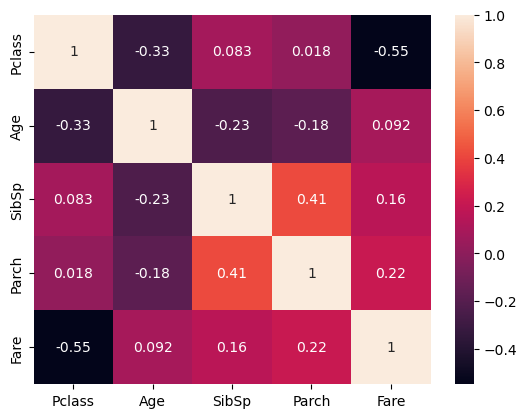

In [45]:
sns.heatmap(data2.corr(),annot=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8932\58766904.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,linewidth=9,vmax=1,vmin=0,cmap='bwr')


<Axes: >

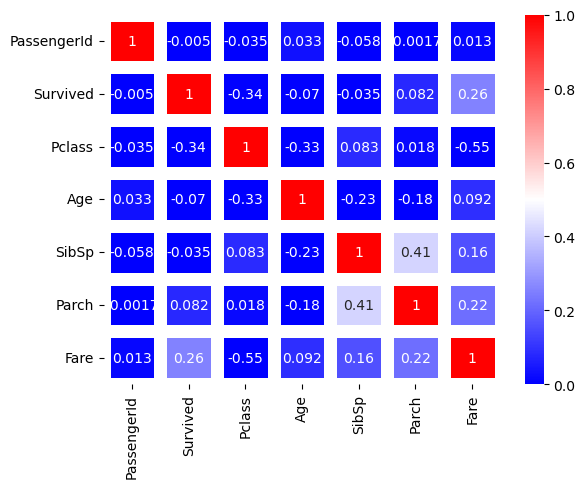

In [46]:
sns.heatmap(data.corr(),annot=True,linewidth=9,vmax=1,vmin=0,cmap='bwr')